In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")
x = np.linspace(-15,15,1000) # 1000 linearly spaced numbers

## Normal Distribution

Let's plot the PDF (probability density function) of a normal distribution. The function is as follows:

$$\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

Where $\mu$ and $\sigma$ are the mean and standard deviation.

$\mathcal{N}(x \mid \mu, \sigma^2)$ is the 'relative' likelihood of drawing $x$ from the model parametrised by $\mu$ and $\sigma$.

Here's the PDF in Python:

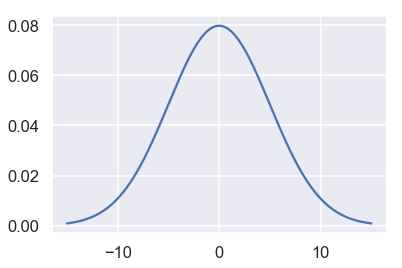

In [36]:
def normal_pdf(x, mu, sigma):
    """PDF for normal distribution"""
    return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(- (x - mu)**2 / (2 * sigma**2) )

# Let's plot a normal distribution
sns.lineplot(x, normal_pdf(x, 0.0, 5.0))
plt.savefig("normal_distribution_mu0_sd5.png", dpi=150, bbox_inches='tight')

## Model multiple distributions

What if the data is complicated? It be a combination of multiple normal-ish distributions.

Let's try this out:

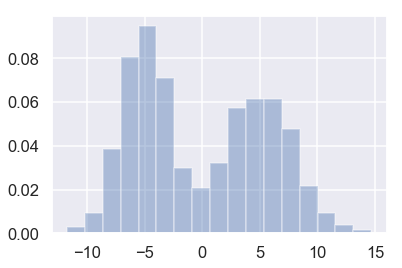

In [3]:
# Let's try modelling two different distributions
s1 = np.random.normal(-5, 2.0, 1000)
s2 = np.random.normal(5, 3.0, 1000)
all_s = np.concatenate([s1, s2])

sns.distplot(all_s, hist=True, kde=False, norm_hist=True)
plt.savefig("complex_distribution_hist.png", dpi=150, bbox_inches='tight')

We can try to model this data with a normal distribution by calculating the mean and standard deviation, but it leads to a very poor model.

Plotting with normal distribution with mu= -0.08174492647042417 and sd= 5.619525455269863


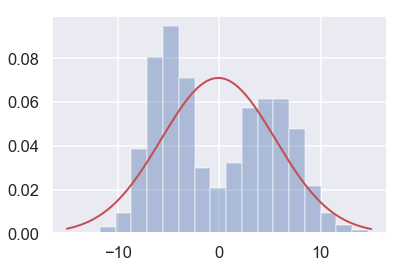

In [4]:

s_mean = np.mean(all_s) # calculate mean of the whole sample
s_sd = np.std(all_s) # calculate standard deviation of the whole sample.

print("Plotting with normal distribution with mu=", s_mean, "and sd=", s_sd)
sns.distplot(all_s, hist=True, kde=False, norm_hist=True)
sns.lineplot(x, normal_pdf(x, s_mean, s_sd), linewidth=2, color='r')
plt.savefig("complex_distribution_hist_and_normal.png", dpi=150, bbox_inches='tight')

## Solution! Mixture Distribution

A mixture distribution lets us mix multiple different distributions together. In our case, we're just considering mixtures of normal models, but you can mix other models as well. The idea is to weight each distribution, so some might be more or less important, and then add them together.

- Suppose that you have $K$ mixture components (number of distributions).
- Then you need $K$ distribution parameters ($\mu$ and $\sigma$), one for each component. Let's call these $\mu_i$ and $\sigma_i$ where $i \in [1, \ldots, K]$.
- Finally we need some weights $\pi_i$, $i \in [1, \ldots, K]$, such that $\sum_{i=1}^K \pi_i = 1$

Now the PDF of this mixture model will be:

$$p(x) = \sum_{i=1}^K \pi_i\mathcal{N}(x \mid \mu, \sigma^2)$$

That is, the likelihood of $x$ occuring in the distribution is the sum of the weighted likelihoods for $x$ from each Guassian model.

Let's implement this in Python:

In [37]:
def mixture_of_normals_pdf(x, K, pis, mus, sigmas):
    """PDF for a mixture model of K normal distributions"""
    output = 0
    for i in range(K):
        output += pis[i] * normal_pdf(x, mus[i], sigmas[i])
    return output

## Back to the data...

Returning to our modelling problem, let's plot the PDF of a evenly-weighted mixture of the two sample normal models.

this means that:

- $K = 2$
- $\boldsymbol\pi = [0.5, 0.5]$
- $\boldsymbol\mu = [-5, 5]$
- $\boldsymbol\sigma = [2, 3]$

(bold used to indicate the vector of parameters for each component)

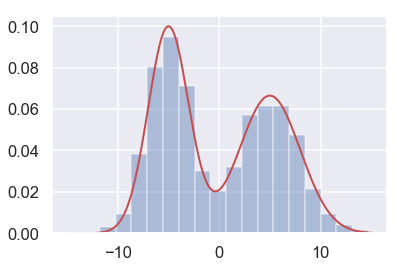

In [6]:
sns.distplot(all_s, hist=True, kde=False, norm_hist=True)
sns.lineplot(x, mixture_of_normals_pdf(x, 2, [0.5,0.5], [-5,5], [2,3]), linewidth=2, color='r')
plt.savefig("complex_distribution_hist_and_mixture.png", dpi=150, bbox_inches='tight')
## Much better!

Much better!

## Plotting a more complex mixture model

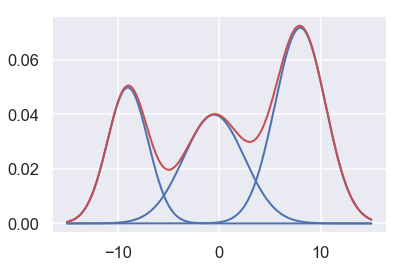

In [7]:
K = 3
pis = [0.25, 0.3, 0.45]
mus = [-9, -0.5, 8]
sds = [2, 3, 2.5]

sns.lineplot(x, pis[0]*normal_pdf(x, mus[0], sds[0]), linewidth=2, color='b')
sns.lineplot(x, pis[1]*normal_pdf(x, mus[1], sds[1]), linewidth=2, color='b')
sns.lineplot(x, pis[2]*normal_pdf(x, mus[2], sds[2]), linewidth=2, color='b')
sns.lineplot(x, mixture_of_normals_pdf(x, K, pis, mus, sds), linewidth=2, color='r')
plt.savefig("complex_mixture.png", dpi=150, bbox_inches='tight')

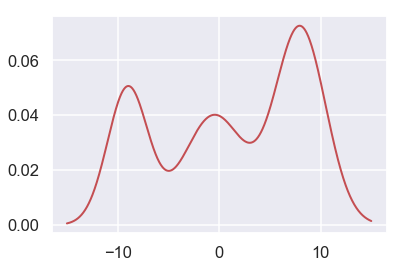

In [33]:
sns.lineplot(x, mixture_of_normals_pdf(x, K, pis, mus, sds), linewidth=2, color='r')
plt.savefig("mixture_plot.png", dpi=150, bbox_inches='tight')

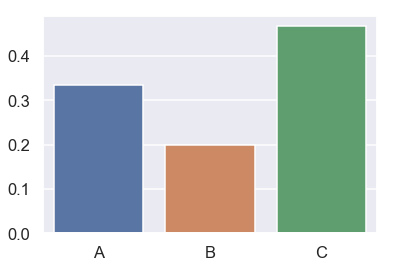

In [35]:
data = ['A','A','A','A','A','B','B','B','C','C','C','C','C','C','C']
L = pd.Series(data).value_counts(normalize=True, sort=False)
sns.barplot(x=L.index, y=L)
plt.savefig("categorical_plot.png", dpi=150, bbox_inches='tight')
#sns.barplot(x=data) #,  estimator='percentage')
